In [ ]:
#These are Different classifications of variables and this will help us choose between different Machine Learning Algorithms
# Continuous variables:
stock_price = 100.50
exchange_rate = 1.20
interest_rate = 0.05

# Discrete variables:
credit_score = 720
number_of_dependents = 2
loan_term = 30

# Categorical variables:
loan_type = "mortgage"
employment_status = "employed"
property_type = "single-family home"

# Ordinal variables:
credit_rating = "A"
risk_level = "medium"
satisfaction_level = "high"

# Binary variables:
has_credit_card = True
is_delinquent = False


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Import US Retail Sales Monthly data as csv with pandas
data = pd.read_csv("/content/drive/MyDrive/Retail Sales Monthly.csv")
data.head()


,DATE,MRTSSM44000USN
0,1992-01-01,130683.0
1,1992-02-01,131244.0
2,1992-03-01,142488.0
3,1992-04-01,147175.0
4,1992-05-01,152420.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming your data is loaded into a pandas DataFrame named 'data'
# Separate Year, Month, Day
data['Year'] = pd.to_datetime(data['DATE']).dt.year
data['Month'] = pd.to_datetime(data['DATE']).dt.month
data['Day'] = pd.to_datetime(data['DATE']).dt.day

# One-Hot Encode Month
month_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['Month']])
month_encoded_df = pd.DataFrame(month_encoded, columns=month_encoder.get_feature_names_out(['Month']))
data = pd.concat([data, month_encoded_df], axis=1).drop('DATE', axis=1)  # Drop original DATE column

# ... rest of your code for training the model (using the newly created features)
data.head()


,MRTSSM44000USN,Year,Month,Day,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,130683.0,1992,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,131244.0,1992,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,142488.0,1992,3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,147175.0,1992,4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,152420.0,1992,5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


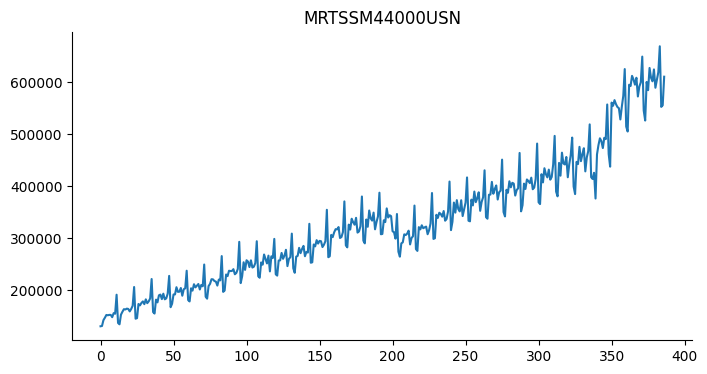

In [ ]:
# @title MRTSSM44000USN

from matplotlib import pyplot as plt
data['MRTSSM44000USN'].plot(kind='line', figsize=(8, 4), title='MRTSSM44000USN')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# define X and Y variables for the data
X = data.drop('MRTSSM44000USN', axis=1)  # Features
y = data['MRTSSM44000USN']  # Target variable

# Split data into training and testing sets for evaluation (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Lasso model with hyperparameter tuning
lasso = Lasso(alpha=0.01)  # Start with a smaller alpha for L1 regularization
lasso.fit(X_train, y_train)

# Print the coefficients
print(lasso.coef_)

# Make predictions on the test set (if using train-test split)
y_pred = lasso.predict(X_test)

# Evaluate model performance (optional)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")


[ 12440.63047244   5137.27186925      0.         -10577.39929458
 -19853.17479945  16764.02517173   4368.98980117  22666.21501602
   5180.93360106  -2276.61921942   6461.84405486 -24804.24858769
 -17689.63879274 -16554.18241785  24682.33375538]
Mean Squared Error: 865471373.48
R-squared Score: 0.9478


In [2]:
import pandas as pd


data = pd.read_csv("application_data.csv")
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv('application_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop columns with more than 50% missing values
threshold = 0.5
data = data[data.columns[data.isnull().mean() < threshold]]

# Fill remaining missing values with the median for numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Encode categorical variables
categorical_features = data.select_dtypes(include=[object]).columns
for col in categorical_features:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Verify there are no missing values left
print(data.isnull().sum().sum())

# Separate features and target
X = data.drop(columns=['TARGET'])
y = data['TARGET']


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Fit a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))


Training Accuracy: 0.9222
Testing Accuracy: 0.9120
Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     25640
         1.0       0.20      0.02      0.04      2310

    accuracy                           0.91     27950
   macro avg       0.56      0.51      0.50     27950
weighted avg       0.86      0.91      0.88     27950



In [6]:
# code for visual representation of KNN being trained
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('application_data.csv')

# Drop columns with more than 50% missing values
threshold = 0.5
data = data[data.columns[data.isnull().mean() < threshold]]

# Fill remaining missing values with the median for numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Encode categorical variables
categorical_features = data.select_dtypes(include=[object]).columns
for col in categorical_features:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Separate features and target
X = data.drop(columns=['TARGET'])
y = data['TARGET']

# Select two features for visualization
X_vis = X[['AMT_CREDIT', 'AMT_INCOME_TOTAL']]  # Replace with any two relevant features

# Split the data into training and testing sets
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_vis_scaled = scaler.fit_transform(X_train_vis)
X_test_vis_scaled = scaler.transform(X_test_vis)


In [7]:
# Fit a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vis_scaled, y_train_vis)

# Make predictions
y_pred_train_vis = knn.predict(X_train_vis_scaled)
y_pred_test_vis = knn.predict(X_test_vis_scaled)

# Evaluate the model
train_accuracy_vis = accuracy_score(y_train_vis, y_pred_train_vis)
test_accuracy_vis = accuracy_score(y_test_vis, y_pred_test_vis)
print(f"Training Accuracy: {train_accuracy_vis:.4f}")
print(f"Testing Accuracy: {test_accuracy_vis:.4f}")

# Print classification report
print("Classification Report (Test Set):")
print(classification_report(y_test_vis, y_pred_test_vis))


Training Accuracy: 0.9145
Testing Accuracy: 0.9113
Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     44285
         1.0       0.10      0.01      0.02      3868

    accuracy                           0.91     48153
   macro avg       0.51      0.50      0.49     48153
weighted avg       0.85      0.91      0.88     48153



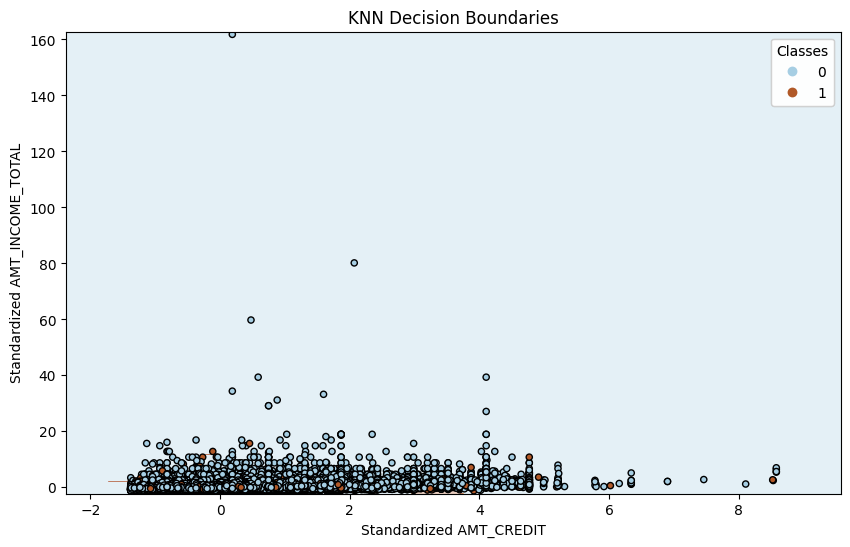

In [8]:
# Plot the decision boundaries of KNN
def plot_decision_boundaries(X, y, model, ax):
    # Define the min and max values for the features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict the classification for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the original points
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.Paired)
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)

# Create a plot to visualize the decision boundaries
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundaries(X_train_vis_scaled, y_train_vis, knn, ax)
ax.set_title('KNN Decision Boundaries')
ax.set_xlabel('Standardized AMT_CREDIT')
ax.set_ylabel('Standardized AMT_INCOME_TOTAL')
plt.show()
